### Import Libraries

In [ ]:
"If it does not work use code below while running this notebook in this dir."
# import sys
# import os
# sys.path.append(os.path.abspath(os.getcwd()))

from mytorch import Tensor, Model
from mytorch import activation as active_func
from mytorch import loss as loss_func
from mytorch import optimizer as optim 
from mytorch import layer as nn
from mytorch.util import DataLoader

from mytorch.util import flatten

import matplotlib.pyplot as plt

# for a better display of progress 
from tqdm.auto import tqdm

### Load MNIST

In [ ]:
"""
load data set with given data loader.
you have 10000 train data, 1000 for each number, remember to shuffle training data.
you have 1000 test data, 100 for each number.

loaded data is a list of (img, label)
type of img is Tensor.

TODO: you have to get this list and create batches for training.
you can also apply this changes later in the Training part for convenience.
"""
data_loader = DataLoader(train_addr='MNIST_light/MNIST/train', test_addr='MNIST_light/MNIST/test')
data_loader.load(train_batch_size=64, test_batch_size=64)
"you can see how data is loaded"
# print(data_loader.getTrain()[0][0].shape)
# print(data_loader.getTrain()[0][1].shape)

loading train...
loading test...
processing...


'you can see how data is loaded'

### Define and Create your Model

In [ ]:
class MyModel(Model):
    def __init__(self):
        super(Model, self).__init__()
        "TODO: define your layers. order is important" 
        self.fc1 = nn.Linear(28 * 28, 256)
        self.relu = active_func.relu
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        self.softmax = active_func.softmax

    def forward(self, x: Tensor) -> Tensor:
        "TODO: define forward pass"
        x = flatten(x)
        x = self.fc1(x)
        x = self.relu(x)

        x = self.fc2(x)
        x = self.relu(x)

        x = self.fc3(x)
        x = self.relu(x)

        x = self.fc4(x)
        x = self.softmax(x)
        
        return x

model = MyModel()
print(model.summary())

fc1:  linear - total param: 200704 - in: 784, out: 256
fc2:  linear - total param: 32768 - in: 256, out: 128
fc3:  linear - total param: 8192 - in: 128, out: 64
fc4:  linear - total param: 640 - in: 64, out: 10
None


### Choose a Loss Function

In [ ]:
"TODO: choose a proper loss function"

criterion = loss_func.CategoricalCrossEntropy

### Choose an Optimizer

In [ ]:
"TODO: choose a proper optimizer"
optimizer = optim.SGD(model.parameters(), learning_rate=0.001)

### Training methods

In [ ]:
# just use it for argmax
import numpy as np

def train_one_epoch(model: Model, data_loader, optimizer: optim, criterion, length):
  acc = 0

  optimizer.zero_grad()

  for batch in data_loader.getTrain():
      x_train_dev = batch[0]
      y_train_dev = batch[1]

      y_pred_dev = model(x_train_dev)

      loss = criterion(y_pred_dev, y_train_dev)

      loss.backward()

      optimizer.step()

      yp= np.argmax(y_pred_dev.data, axis=1)
      acc += np.sum(yp == y_train_dev.data)

  return loss.data, acc/length



def caluculate_acc(data_loader, model, length):
  acc = 0
  for batch in data_loader.getTest():
    x_test_dev = batch[0]
    y_test_dev = batch[1]
    show_batch(x_test_dev, y_test_dev)
    yp = model(x_test_dev)
    
    yp= np.argmax(yp.data, axis=1)
    acc += np.sum(yp == y_test_dev.data)
  return acc / length


def show_batch(X_train, y_train):
  plt.figure(figsize=(10,10))
  for i in range(64):
      plt.subplot(8,8,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(X_train[i].data, cmap=plt.cm.binary)
      plt.xlabel(y_train[i].data)
  plt.show()

### Training Model

  0%|          | 0/3 [00:00<?, ?it/s]/mnt/c61cae30-2704-4fc9-aebc-309eed0d378c/PR2/PR2/mytorch/tensor.py:172: RuntimeWarning: divide by zero encountered in log
  data = np.log(t.data)/np.log(base)
/mnt/c61cae30-2704-4fc9-aebc-309eed0d378c/PR2/PR2/mytorch/tensor.py:291: RuntimeWarning: invalid value encountered in multiply
  data = t1.data * t2.data
/mnt/c61cae30-2704-4fc9-aebc-309eed0d378c/PR2/PR2/mytorch/tensor.py:177: RuntimeWarning: divide by zero encountered in divide
  return grad / (t.data * np.log(base))
/mnt/c61cae30-2704-4fc9-aebc-309eed0d378c/PR2/PR2/mytorch/tensor.py:177: RuntimeWarning: invalid value encountered in divide
  return grad / (t.data * np.log(base))
/mnt/c61cae30-2704-4fc9-aebc-309eed0d378c/PR2/PR2/mytorch/activation/relu.py:16: RuntimeWarning: invalid value encountered in multiply
  return grad * np.where(x._data > 0, grad, 0)
/mnt/c61cae30-2704-4fc9-aebc-309eed0d378c/PR2/PR2/mytorch/tensor.py:143: RuntimeWarning: invalid value encountered in add
  self.grad.da

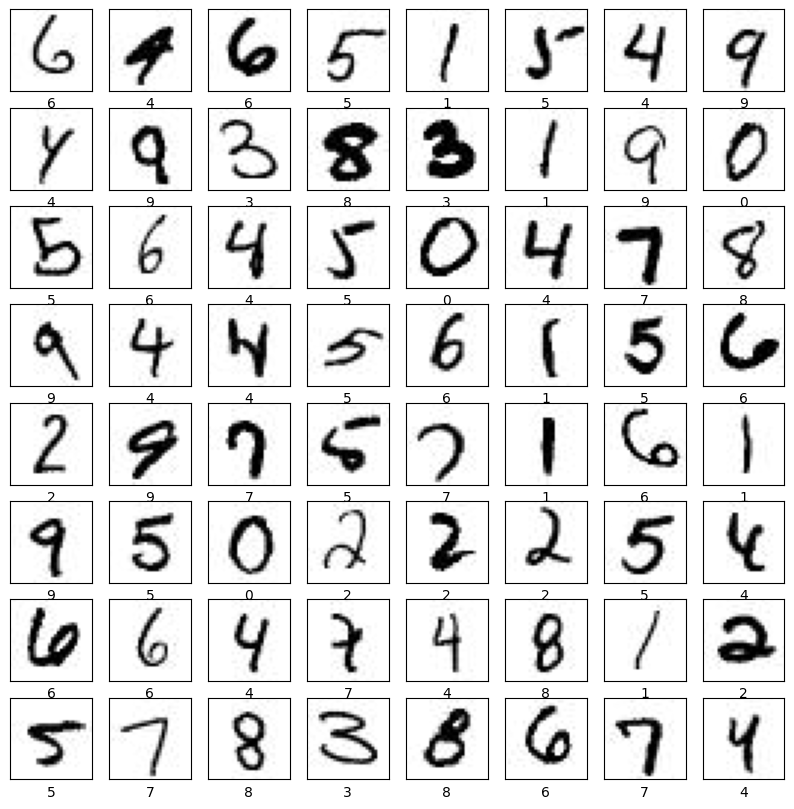

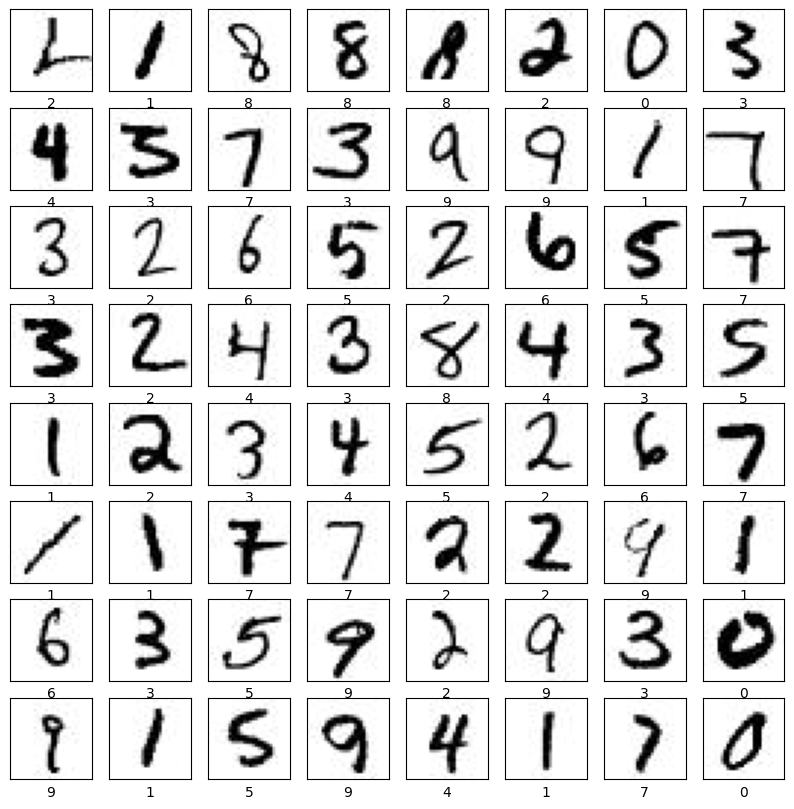

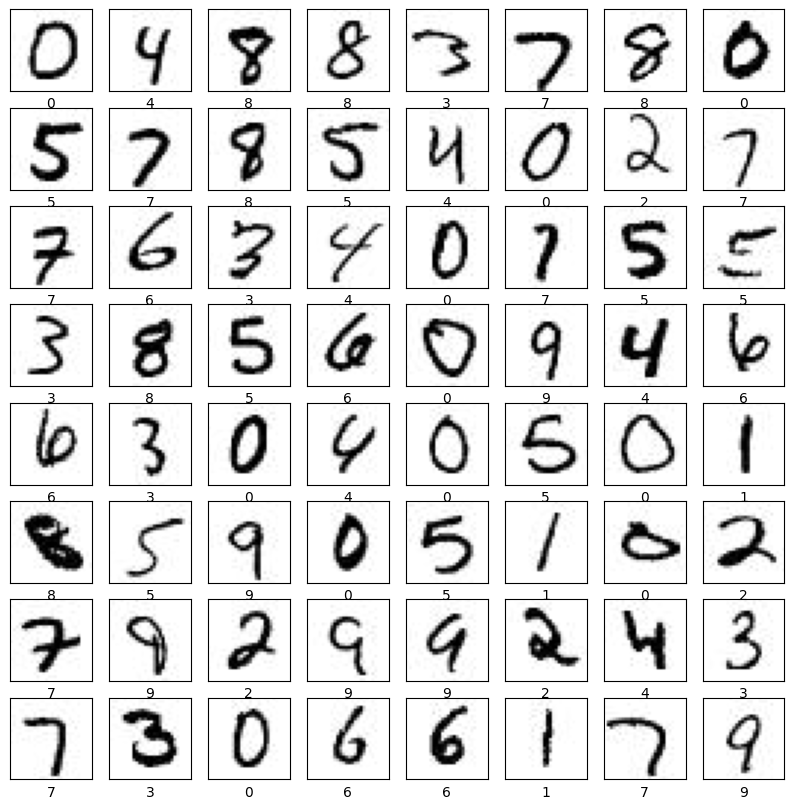

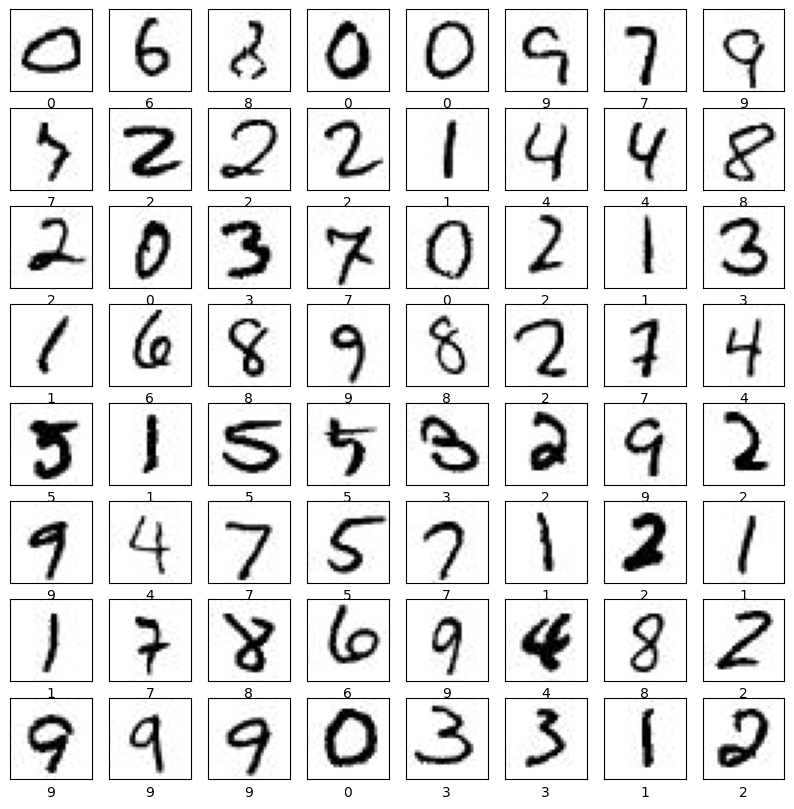

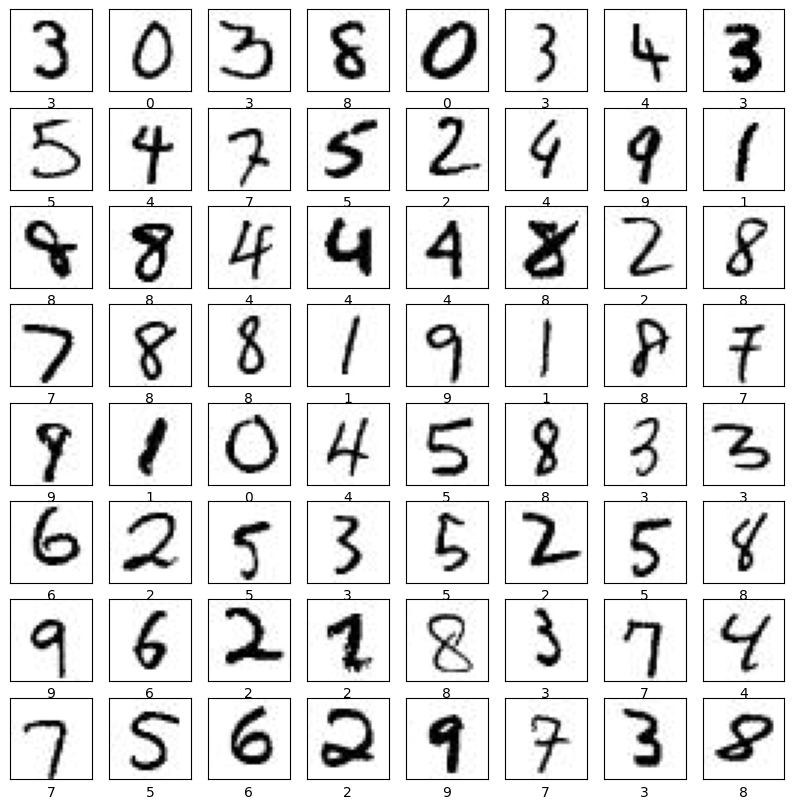

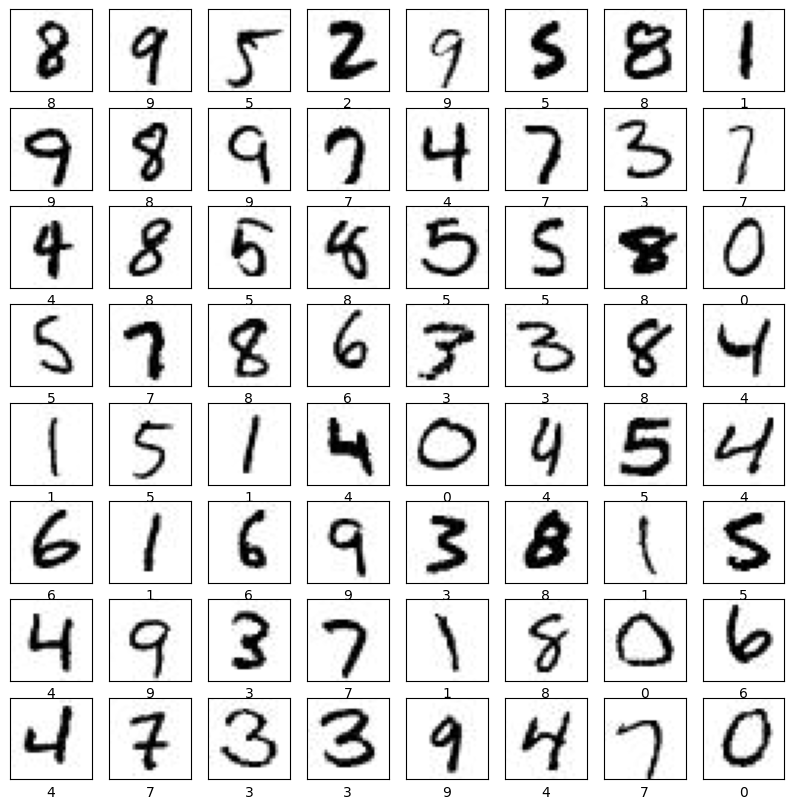

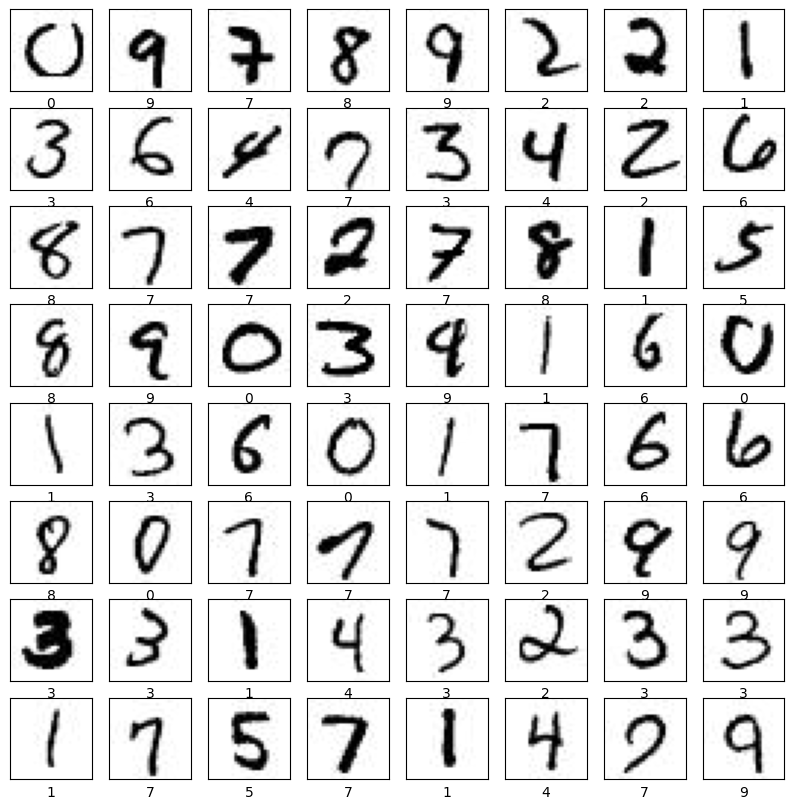

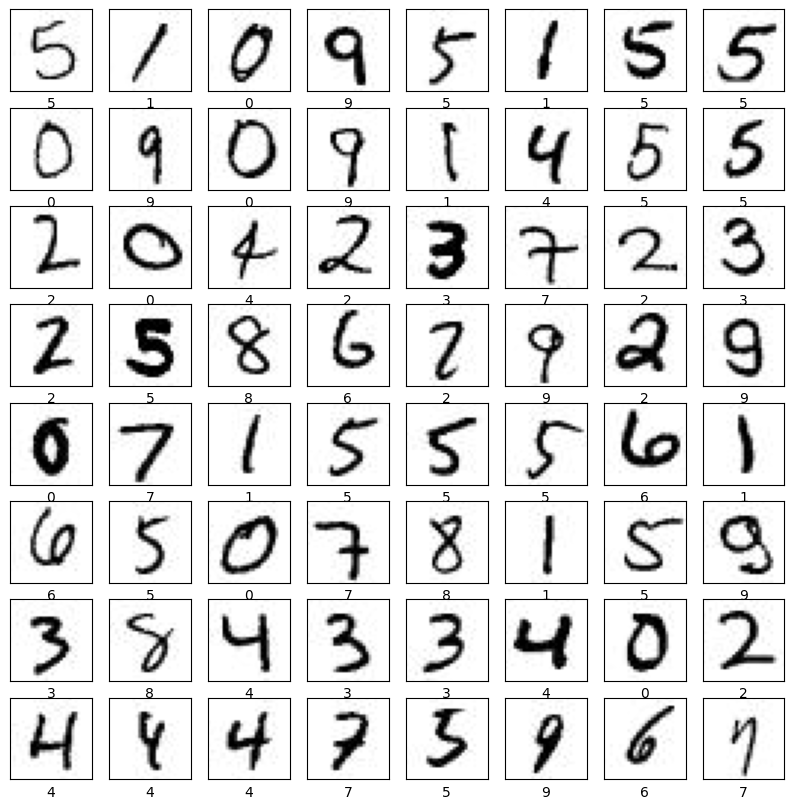

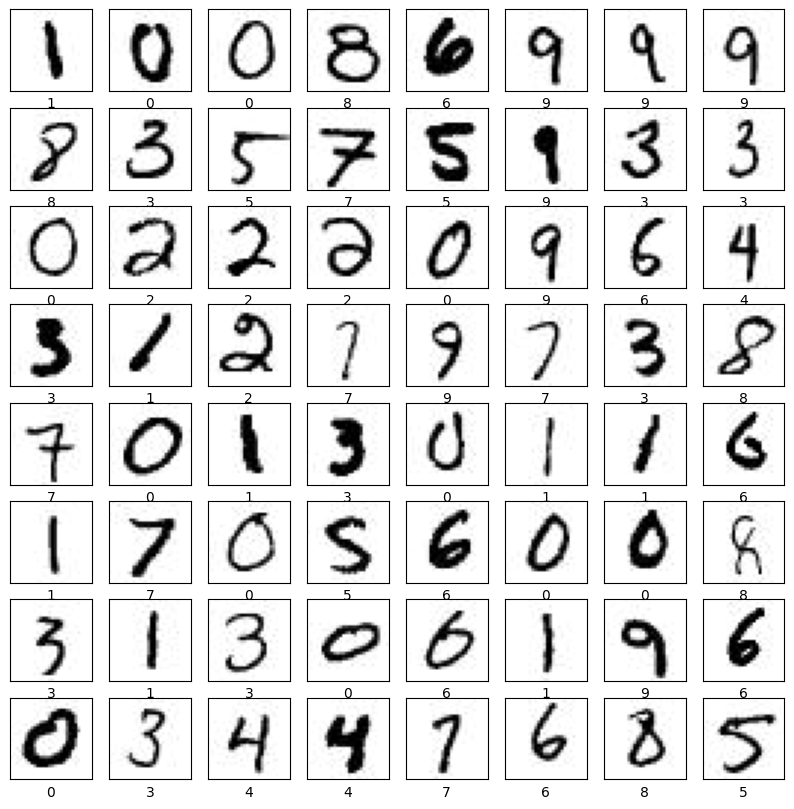

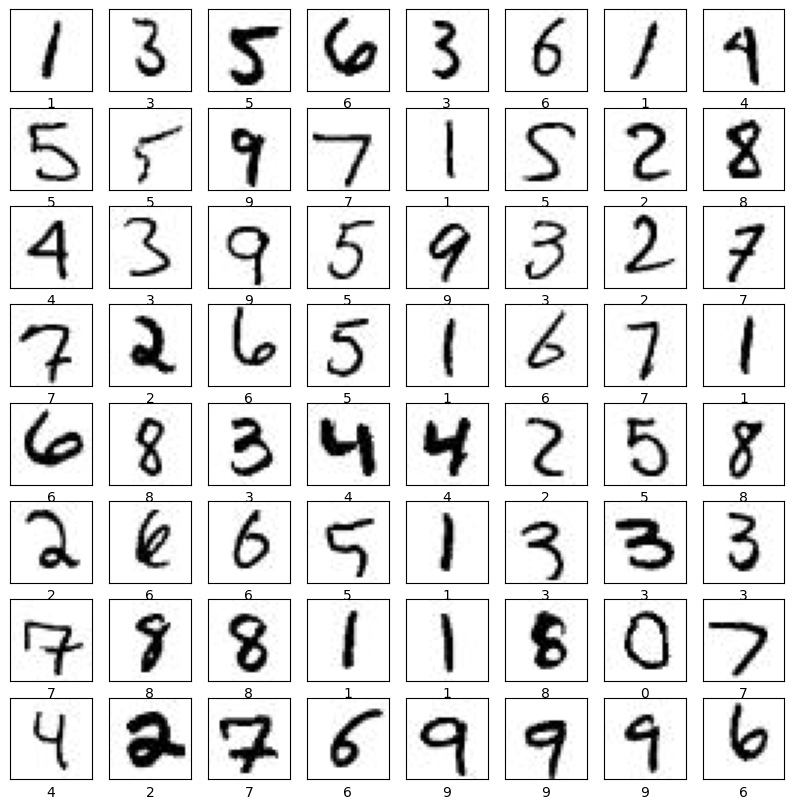

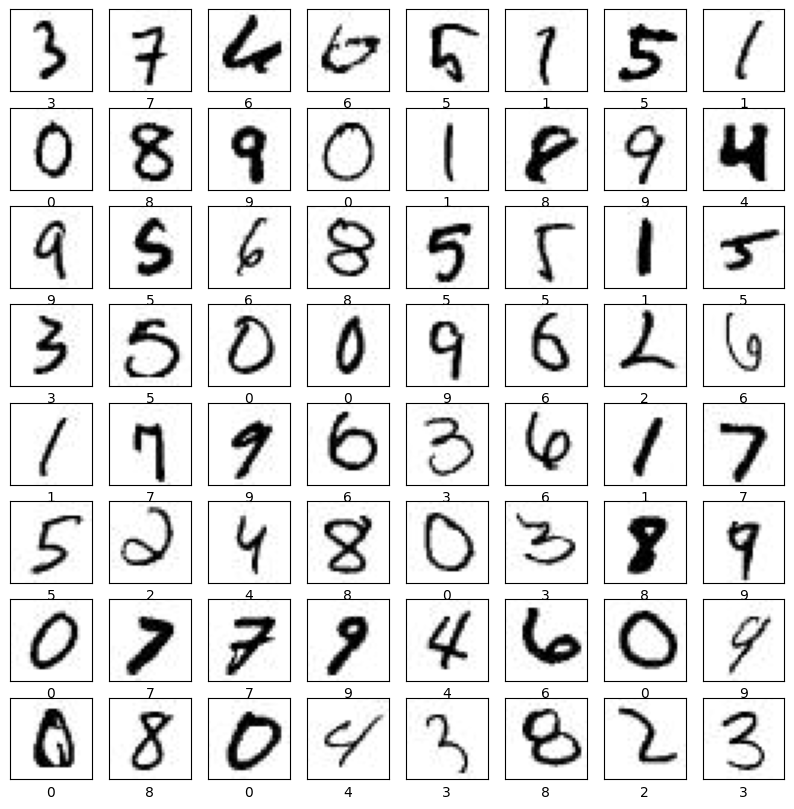

In [54]:
"TODO: define number of epoch and train batches of data on your model. also test each epoch."
EPOCH = 3

for i in tqdm(range(EPOCH)):

    train_acc = []
    test_acc = []
    best_train_acc = 0.0
    best_test_acc = 0.0

    "TODO: train over your defined batches and save train accuracy for each epoch."
    # train_acc.append(train_one_epoch(model, data_loader, optimizer, criterion, 10000)[1].item())
    train_acc.append(train_one_epoch(model, data_loader, optimizer, criterion, 10000)[1])
    
    if best_train_acc < train_acc[-1]:
        best_train_acc = train_acc[-1]

    "TODO: test your model after each training and save test accuracy for each epoch."

    # test_acc.append(caluculate_acc(data_loader, model, 1000).item())
    test_acc.append(caluculate_acc(data_loader, model, 1000))


    if best_test_acc < test_acc[-1]:
        best_test_acc = test_acc[-1]

    if train_acc[-1] > 0.99 and test_acc[-1] > 0.99:
        break


### Evaluate Model Performance

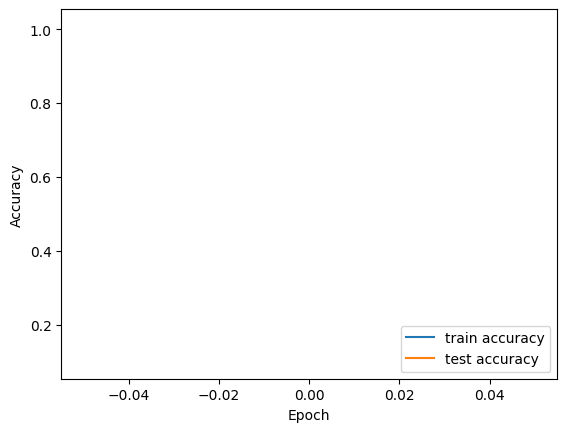


On train - best accuracy: 1.01, final accuracy: 1.01
On test - best accuracy: 0.10, final accuracy: 0.10


In [38]:
plt.plot(train_acc, label='train accuracy')
plt.plot(test_acc, label = 'test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

print("\nOn train - best accuracy: {:.2f}, final accuracy: {:.2f}".format(best_train_acc, train_acc[-1]))
print("On test - best accuracy: {:.2f}, final accuracy: {:.2f}".format(best_test_acc, test_acc[-1]))